### train.py

In [ ]:
# def parse_opt(known=False):
#     parser.add_argument('--hyp', type=str, default=ROOT / 'data/hyps/hyp.scratch.yaml', help='hyperparameters path')

# def main(opt, callbacks=Callbacks()):
#     if not opt.evolve:
#         train(opt.hyp, opt, device, callbacks)

# def train(hyp,  # path/to/hyp.yaml or hyp dictionary
#           opt,
#           device,
#           callbacks
#           ):
#     if isinstance(hyp, str):
#         with open(hyp, errors='ignore') as f:
#             hyp = yaml.safe_load(f)  # load hyps dict
#     LOGGER.info(colorstr('hyperparameters: ') + ', '.join(f'{k}={v}' for k, v in hyp.items()))

# if __name__ == "__main__":
#     opt = parse_opt()
#     main(opt)

### hyp.scratch.yaml (data/hyps/hyp.scratch.yaml)

In [ ]:
# # YOLOv5 🚀 by Ultralytics, GPL-3.0 license
# # Hyperparameters for COCO training from scratch
# # python train.py --batch 40 --cfg yolov5m.yaml --weights '' --data coco.yaml --img 640 --epochs 300
# # See tutorials for hyperparameter evolution https://github.com/ultralytics/yolov5#tutorials

# lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)
# lrf: 0.1  # final OneCycleLR learning rate (lr0 * lrf)
# momentum: 0.937  # SGD momentum/Adam beta1
# weight_decay: 0.0005  # optimizer weight decay 5e-4
# warmup_epochs: 3.0  # warmup epochs (fractions ok)
# warmup_momentum: 0.8  # warmup initial momentum
# warmup_bias_lr: 0.1  # warmup initial bias lr
# box: 0.05  # box loss gain
# cls: 0.5  # cls loss gain
# cls_pw: 1.0  # cls BCELoss positive_weight
# obj: 1.0  # obj loss gain (scale with pixels)
# obj_pw: 1.0  # obj BCELoss positive_weight
# iou_t: 0.20  # IoU training threshold
# anchor_t: 4.0  # anchor-multiple threshold
# # anchors: 3  # anchors per output layer (0 to ignore)
# fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)
# hsv_h: 0.015  # image HSV-Hue augmentation (fraction)
# hsv_s: 0.7  # image HSV-Saturation augmentation (fraction)
# hsv_v: 0.4  # image HSV-Value augmentation (fraction)
# degrees: 0.0  # image rotation (+/- deg)
# translate: 0.1  # image translation (+/- fraction)
# scale: 0.5  # image scale (+/- gain)
# shear: 0.0  # image shear (+/- deg)
# perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
# flipud: 0.0  # image flip up-down (probability)
# fliplr: 0.5  # image flip left-right (probability)
# mosaic: 1.0  # image mosaic (probability)
# mixup: 0.0  # image mixup (probability)
# copy_paste: 0.0  # segment copy-paste (probability)

### HSV parameter example (utils.augmentations.py)

In [ ]:
def augment_hsv(im, hgain=0.5, sgain=0.5, vgain=0.5):
    # HSV color-space augmentation
    if hgain or sgain or vgain:
        r = np.random.uniform(-1, 1, 3) * [hgain, sgain, vgain] + 1  # random gains
        hue, sat, val = cv2.split(cv2.cvtColor(im, cv2.COLOR_BGR2HSV))
        dtype = im.dtype  # uint8

        x = np.arange(0, 256, dtype=r.dtype)
        lut_hue = ((x * r[0]) % 180).astype(dtype)
        lut_sat = np.clip(x * r[1], 0, 255).astype(dtype)
        lut_val = np.clip(x * r[2], 0, 255).astype(dtype)

        im_hsv = cv2.merge((cv2.LUT(hue, lut_hue), cv2.LUT(sat, lut_sat), cv2.LUT(val, lut_val)))
        cv2.cvtColor(im_hsv, cv2.COLOR_HSV2BGR, dst=im)  # no return needed

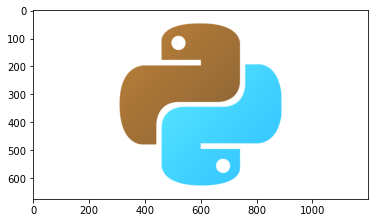

In [253]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('../icon/logo.png')
plt.imshow(img)
plt.show()

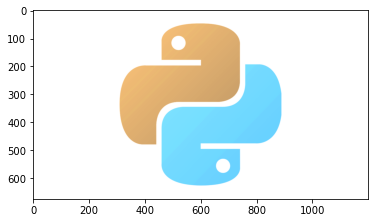

In [254]:
augment_hsv(img, 0.015, 0.7, 0.4)
plt.imshow(img)
plt.show()